# Laboratorio 2 - Agrupación
Grupo: 
- 16

Integrantes:
- 
- 
- Juan Diego Sánchez - 202214625

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

# Carga de datos

In [83]:
df=pd.read_csv('data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv', encoding='latin1', sep=';')
df.sample(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
8427,C18428,14764.03147,0.030475,8539.562901,31910.542320,11405.114890,18555.87504,0.527671,0.655968,0.666445,0.973841,59,119,8307.784342,18395.707480,63469.01287,0.089077,8
3236,C13237,12653.73013,0.720720,43414.305200,7306.732804,18829.799200,33601.86474,0.784448,0.125700,0.520122,1.087173,105,238,14314.119010,9183.979494,61523.96143,0.311980,9
7598,C17599,13747.41054,0.806973,41906.474290,8857.200442,18890.150720,37081.39317,0.816710,0.129512,0.607732,1.068620,110,251,13834.435690,8772.903227,57014.39114,0.369956,10
4848,C14849,16040.70060,0.274271,11302.909470,29730.941350,9404.942748,22985.50555,0.481655,0.780928,0.601300,1.068179,36,159,3849.624896,18487.394340,52939.62857,0.267972,8
1643,C11644,14109.96744,0.802041,42714.118090,8088.074951,19374.836320,33748.78072,0.786106,0.096409,0.574288,1.052718,95,209,12734.256340,9527.881140,53784.67799,0.486911,10


# Entendimiento de los datos

## Perfilamiento

In [84]:
df.shape

(8950, 18)

### Completitud

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

In [86]:
df.isnull().sum()

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

Se observan los datos para la completitud

In [87]:
df[df['LÍMITE_CREDITO'].isnull()]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2223,C12224,5386.597701,0.195623,31058.11769,38490.60757,5292.917978,7599.445162,0.468313,0.421218,0.915907,0.242276,77,67,NaN,22641.87163,31840.28183,0.840785,6


In [88]:
df[df['PAGOS_MINIMOS'].isnull()]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


In [89]:
# Se eliminan por ahora

df_trabajo=df.dropna(subset=['LÍMITE_CREDITO', 'PAGOS_MINIMOS'])

In [90]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8636 non-null   object 
 1   SALDO                8636 non-null   float64
 2   F_SALDO              8636 non-null   float64
 3   COMPRAS              8636 non-null   float64
 4   COMPRAS_PUNTUALES    8636 non-null   float64
 5   COMPRAS_PLAZOS       8636 non-null   float64
 6   AVANCE_EFECTIVO      8636 non-null   float64
 7   F_COMPRAS            8636 non-null   float64
 8   F_COMPRAS_PUNTUALES  8636 non-null   float64
 9   F_COMPRAS_PLAZOS     8636 non-null   float64
 10  F_AVANCE_EFECTIVO    8636 non-null   float64
 11  P_AVANCE_EFECTIVO    8636 non-null   int64  
 12  P_COMPRAS            8636 non-null   int64  
 13  LÍMITE_CREDITO       8636 non-null   float64
 14  PAGOS                8636 non-null   float64
 15  PAGOS_MINIMOS        8636 non-null   float6

In [91]:
df_trabajo.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.734601,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.422409,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.028778,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Visualización

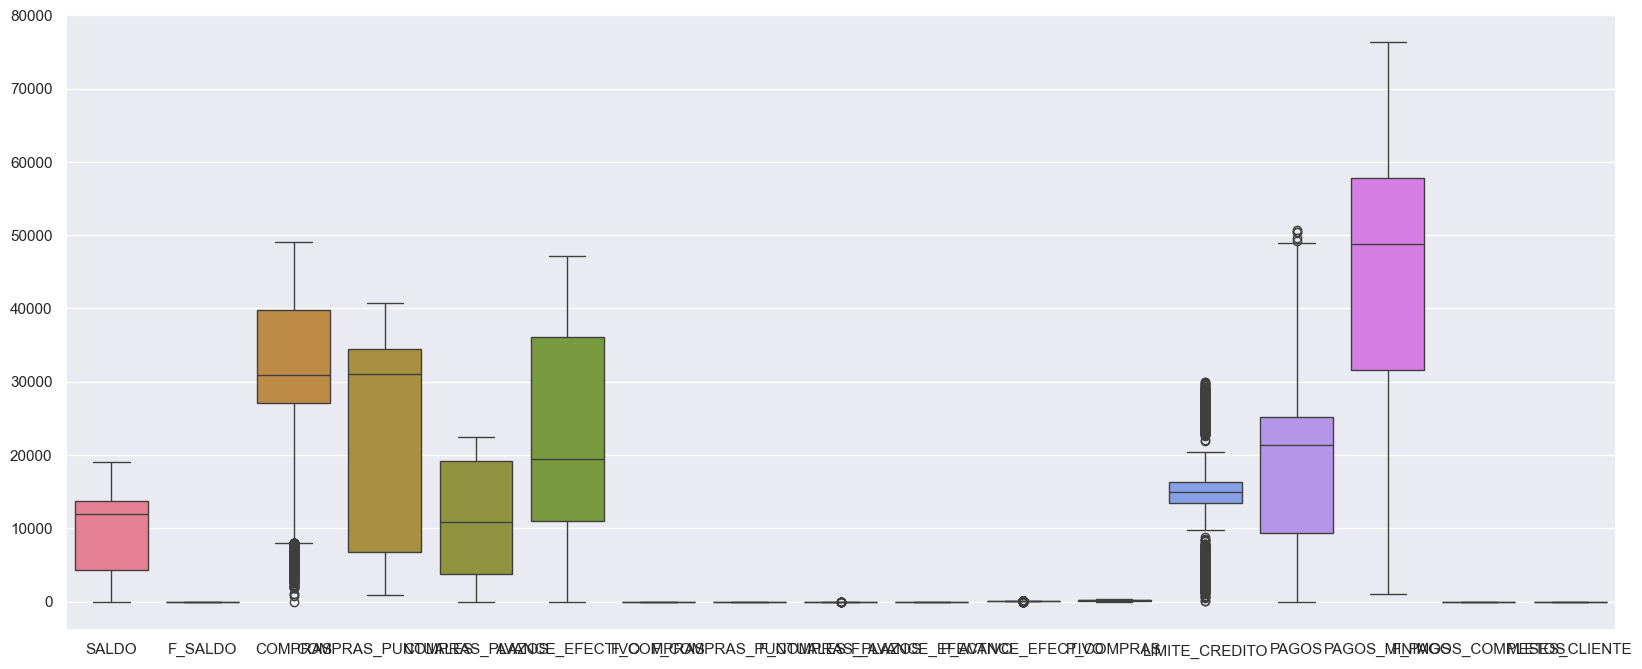

In [97]:
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo, orient="v")

Se filtran por los más cercanos en dominio

In [95]:
a=df_trabajo.columns.drop(['ID','MESES_CLIENTE','SALDO','COMPRAS','COMPRAS_PUNTUALES','AVANCE_EFECTIVO','COMPRAS_PLAZOS','P_AVANCE_EFECTIVO', 'P_COMPRAS', 'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS' ])
b=df_trabajo.columns.drop(list(a)).drop(['ID', 'MESES_CLIENTE','P_AVANCE_EFECTIVO', 'P_COMPRAS'])
c=df_trabajo.columns.drop(list(a)).drop(list(b)).drop(['ID','MESES_CLIENTE'])

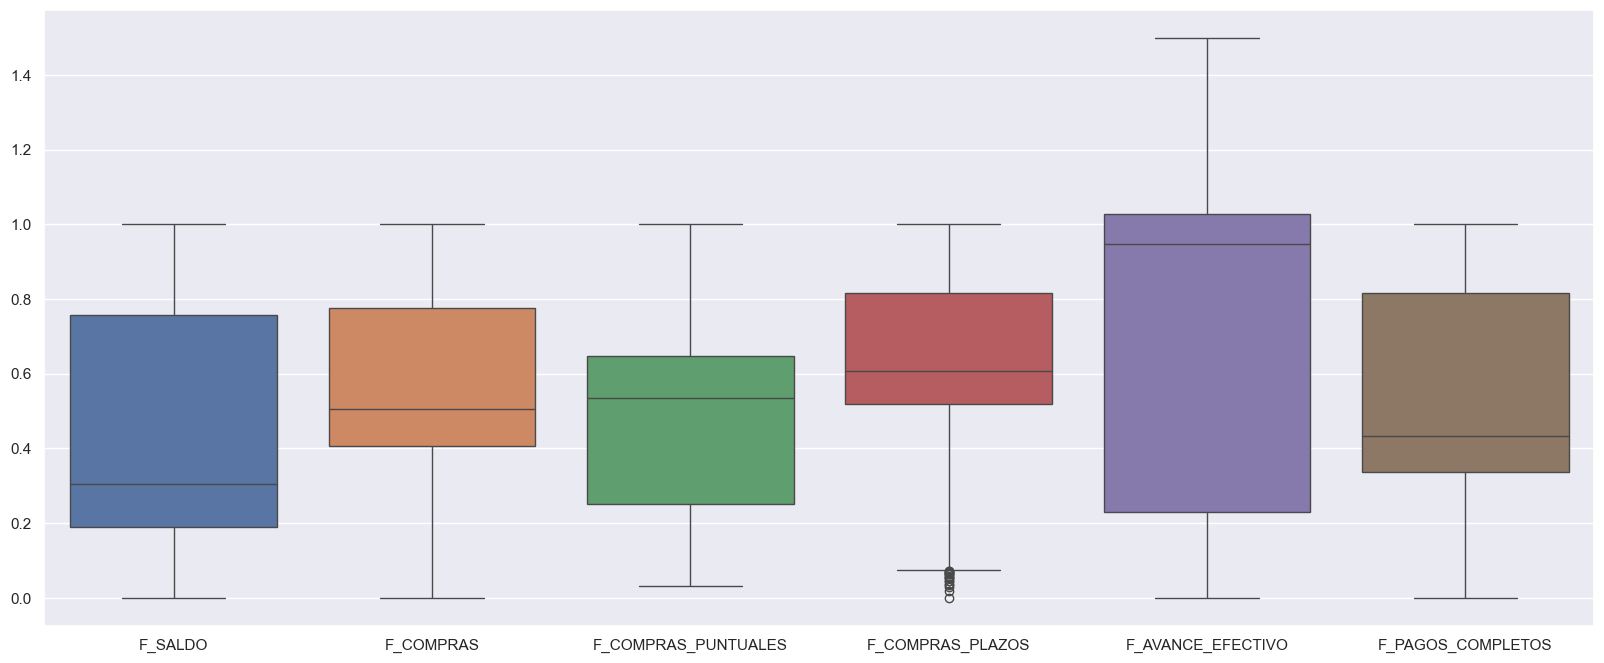

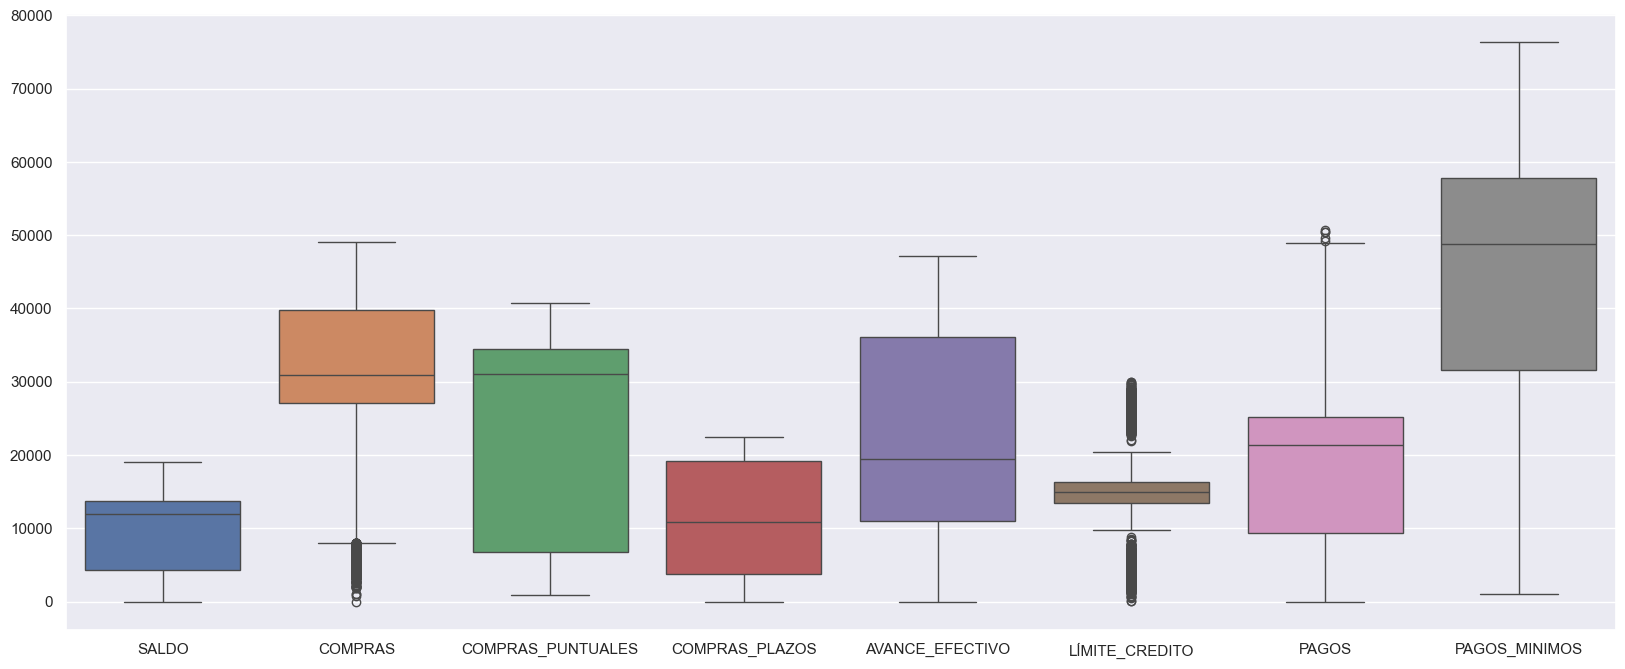

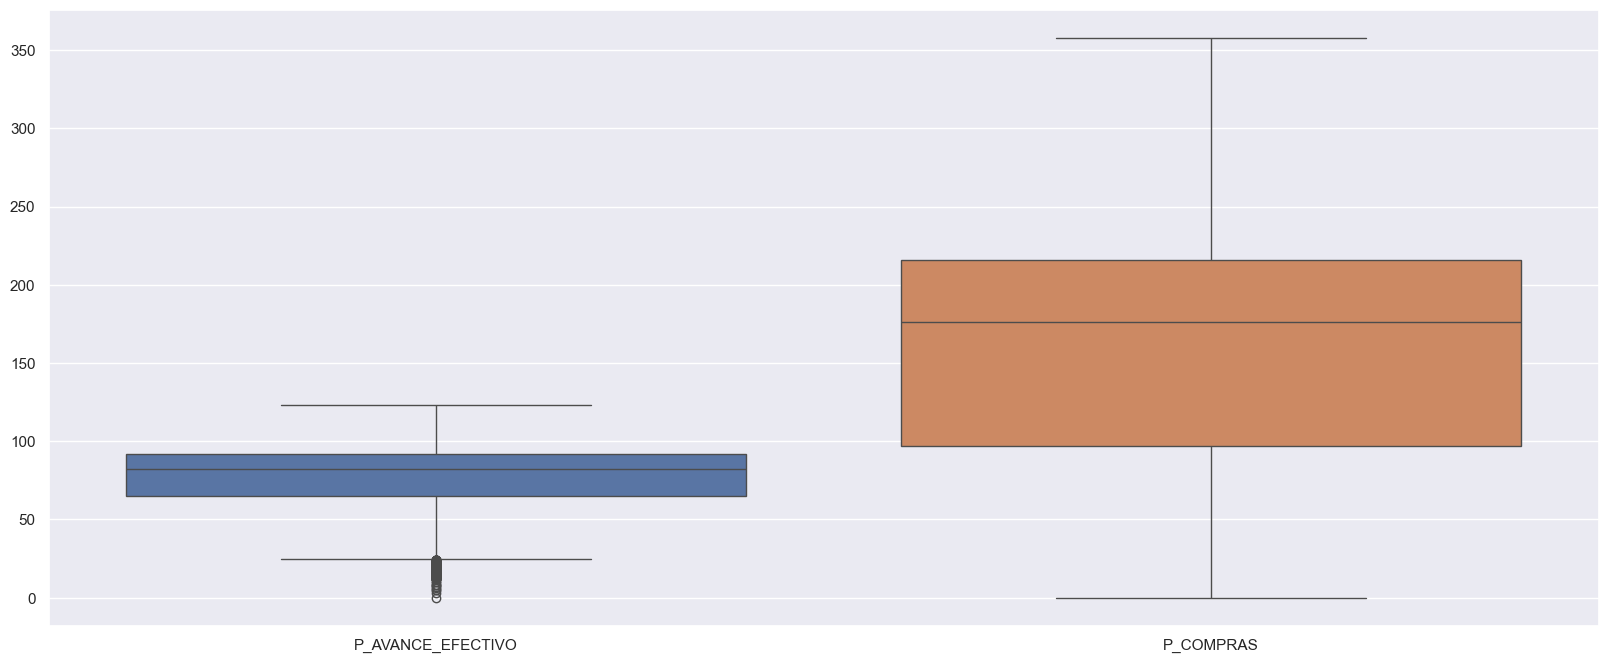

In [96]:
#Visualización de todas las variables numéricas
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[a], orient="v")
plt.show()
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[b], orient="v")
plt.show()
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[c], orient="v")


<Axes: xlabel='MESES_CLIENTE'>

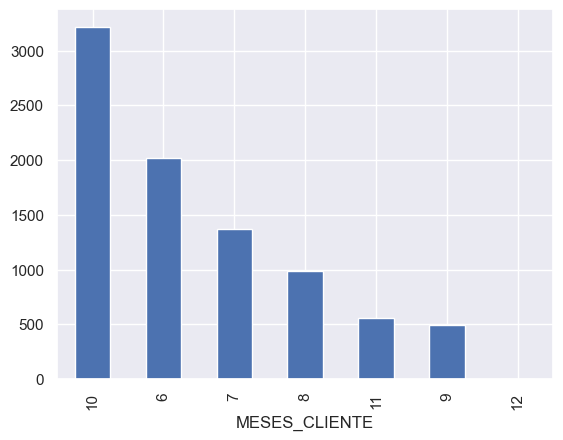

In [98]:
# Cómo se ven los meses
df_trabajo['MESES_CLIENTE'].value_counts().plot(kind='bar')

### Duplicados

In [99]:
df_trabajo.duplicated().sum()

0

In [100]:
df_trabajo.duplicated(subset=['ID']).sum()

0